In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Checking stocks

In [2]:
stocks_all = ['CHMF','NLMK','GMKN','AKRN','VSMO','MAGN','TATNP','SNGSP','MTSS','SIBN','SBER','LKOH']
max_bye_price = [800,140,10500,3200,11000,25,280,30,230,220,110,3500]
#['NLMK','RASP','SBERP','SIBN','SNGSP','SVAV','VSMO','AFLT','GAZP','SBER','ROSN','SNGS','LKOH','RTKM','TATN','TATNP','MTSS','AKRN','CHMF','GMKN','MAGN','MGNT']

In [3]:
in_lot = pd.read_excel('stock_in_lot.xlsx')
in_lot[in_lot.stock=='AFLT'].stock_in_lot.values

array([100], dtype=int64)

In [4]:
divs = pd.read_excel('Dividends.xlsx', parse_dates=[1])
divs = pd.merge(divs, in_lot, left_on = 'tiker', right_on = 'stock').drop('stock',axis=1)
divs['div_by_lot'] = divs.dividend*divs.stock_in_lot

In [5]:
divs['month'] = divs['date'].apply(lambda x : x.month)
divs['year'] = divs['date'].apply(lambda x : x.year)
divs['month_id']=divs['year']*100+divs['month']

In [6]:
divs.head()

,tiker,date,dividend,stock_in_lot,div_by_lot,month,year,month_id
0,AFLT,2003-03-07,0.29,100,29.0,3,2003,200303
1,AFLT,2004-04-19,0.43,100,43.0,4,2004,200404
2,AFLT,2005-04-30,0.70,100,70.0,4,2005,200504
3,AFLT,2006-04-29,0.82,100,82.0,4,2006,200604
4,AFLT,2007-05-07,1.29,100,129.0,5,2007,200705


Download Data

In [112]:
prices = pd.DataFrame()
for paper in stocks_all:
    a = pd.read_csv(str(paper)+str('_070601_180903.csv'), parse_dates=[0])
    a['paper'] = paper
    a.columns = ['date', 'time', 'open', 'high', 'low', 'close','vol', 'paper']
    a.drop(['time', 'open', 'high', 'low','vol'],axis=1,inplace=True)
    a.close=a.close*in_lot[in_lot.stock==paper].stock_in_lot.values
    prices = prices.append(a)
#prices.columns = ['date', 'time', 'open', 'high', 'low', 'close','vol', 'paper']

In [113]:
def rand_date(array):
    len_ar = len(array)
    position = np.random.randint(len_ar)
    return array[position]

In [114]:
prices['month'] = prices['date'].apply(lambda x : x.month)
prices['year'] = prices['date'].apply(lambda x : x.year)
prices['month_id']=prices['year']*100+prices['month']

In [115]:
prices = prices[prices.year>=2016]
months = np.unique(np.sort(prices['month_id']))

In [116]:
name = 'Юрий'

after buy CHMF 6515.0 205692.485
after buy NLMK 661.0 205030.824
after buy GMKN 8991.0 196030.83299999998
after buy MAGN 1978.0 194050.85499999998
after buy TATNP 1878.0 192170.97699999998
after buy MTSS 2240.0 189928.737
after buy SIBN 1449.0 188478.288
after buy SBER 957.5 187519.8305
after buy LKOH 2400.5 185116.93000000002
paper is expensive or you enough to by they (dolya>) VSMO 185116.93000000002
paper is expensive or you enough to by they (dolya>) SNGSP 185116.93000000002
paper is expensive or you enough to by they (dolya>) AKRN 185116.93000000002

in portfolio 1 CHMF [6515.] [6515.]
in portfolio 1 NLMK [661.] [661.]
in portfolio 1 GMKN [8991.] [8991.]
in portfolio 0 AKRN [3733.] [0.]
in portfolio 0 VSMO [12630.] [0.]
in portfolio 1 MAGN [1978.] [1978.]
in portfolio 1 TATNP [1878.] [1878.]
in portfolio 0 SNGSP [4421.] [0.]
in portfolio 1 MTSS [2240.] [2240.]
in portfolio 1 SIBN [1449.] [1449.]
in portfolio 1 SBER [957.5] [957.5]
in portfolio 1 LKOH [2400.5] [2400.5]
after buy CH

after buy MAGN 1978.0 30263.23100000014
after buy TATNP 1878.0 28383.35300000014
after buy MTSS 2240.0 26141.113000000143
after buy SIBN 1449.0 24690.664000000143
after buy SBER 957.5 23732.206500000142
after buy LKOH 2400.5 21329.306000000142
paper is expensive or you enough to by they (dolya>) VSMO 21329.306000000142
paper is expensive or you enough to by they (dolya>) SNGSP 21329.306000000142
paper is expensive or you enough to by they (dolya>) AKRN 21329.306000000142
paper is expensive or you enough to by they (dolya>) GMKN 21329.306000000142
paper is expensive or you enough to by they (dolya>) CHMF 21329.306000000142

in portfolio 6 CHMF [6515.] [39090.]
in portfolio 10 NLMK [661.] [6610.]
in portfolio 4 GMKN [8991.] [35964.]
in portfolio 0 AKRN [3733.] [0.]
in portfolio 0 VSMO [12630.] [0.]
in portfolio 10 MAGN [1978.] [19780.]
in portfolio 10 TATNP [1878.] [18780.]
in portfolio 0 SNGSP [4421.] [0.]
in portfolio 10 MTSS [2240.] [22400.]
in portfolio 10 SIBN [1449.] [14490.]
in po

C:\Users\1INVESTOR\Anaconda3\lib\site-packages\ipykernel_launcher.py:114: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.


 0 AKRN [3610.] [0.]
in portfolio 0 VSMO [12800.] [0.]
in portfolio 14 MAGN [1890.] [26460.]
in portfolio 13 TATNP [1853.] [24089.]
in portfolio 0 SNGSP [4444.5] [0.]
in portfolio 11 MTSS [2380.] [26180.]
in portfolio 13 SIBN [1454.5] [18908.5]
in portfolio 13 SBER [1032.] [13416.]
in portfolio 11 LKOH [2610.] [28710.]
after buy NLMK 746.5999999999999 4885.801800000142
after buy MAGN 1889.9999999999998 2993.9118000001426
after buy TATNP 1853.0 1139.0588000001428
not enough money for buy SIBN 1454.5 1139.0588000001428
after buy SBER 1032.0 106.02680000014288
paper is expensive or you enough to by they (dolya>) VSMO 106.02680000014288
paper is expensive or you enough to by they (dolya>) SNGSP 106.02680000014288
paper is expensive or you enough to by they (dolya>) AKRN 106.02680000014288
paper is expensive or you enough to by they (dolya>) MTSS 106.02680000014288
paper is expensive or you enough to by they (dolya>) GMKN 106.02680000014288
paper is expensive or you enough to by they (dolya


in portfolio 7 CHMF [6890.] [48230.]
in portfolio 21 NLMK [816.7] [17150.7]
in portfolio 5 GMKN [8349.] [41745.]
in portfolio 0 AKRN [3405.] [0.]
in portfolio 0 VSMO [11910.] [0.]
in portfolio 17 MAGN [2475.] [42075.]
in portfolio 18 TATNP [1756.] [31608.]
in portfolio 0 SNGSP [3865.] [0.]
in portfolio 11 MTSS [2530.] [27830.]
in portfolio 19 SIBN [1591.] [30229.]
in portfolio 15 SBER [1348.1] [20221.5]
in portfolio 13 LKOH [2660.] [34580.]
201606 AKRN dividend - 0.0
201606 GMKN dividend - 1001.1089999999998
201606 MAGN dividend - 458.49
201606 NLMK dividend - 650.412
201606 SBER dividend - 257.085
201606 SIBN dividend - 90.915
201606 12364 274184.0 [293716.3608] [41959.48011429] 2505.1718000001497
In this month your dividend is  [2458.011]
after buy NLMK 908.0 13810.26380000015
after buy GMKN 9445.0 4355.81880000015
after buy TATNP 1659.0 2695.1598000001504
after buy SIBN 1646.0 1047.5138000001507
not enough money for buy LKOH 2836.5 1047.5138000001507
paper is expensive or you enoug

in portfolio 0 VSMO [13430.] [0.]
in portfolio 17 MAGN [3220.] [54740.]
in portfolio 23 TATNP [2031.] [46713.]
in portfolio 1 SNGSP [2969.5] [2969.5]
in portfolio 12 MTSS [2208.] [26496.]
in portfolio 24 SIBN [1860.] [44640.]
in portfolio 15 SBER [1497.5] [22462.5]
in portfolio 15 LKOH [3105.] [46575.]
after buy NLMK 1172.6000000000001 1497.7734000001585
not enough money for buy TATNP 2031.0 1497.7734000001585
not enough money for buy SNGSP 2969.5 1497.7734000001585
not enough money for buy MTSS 2208.0 1497.7734000001585
not enough money for buy SIBN 1860.0 1497.7734000001585
not enough money for buy LKOH 3105.0 1497.7734000001585
paper is expensive or you enough to by they (dolya>) VSMO 1497.7734000001585
paper is expensive or you enough to by they (dolya>) CHMF 1497.7734000001585
paper is expensive or you enough to by they (dolya>) SBER 1497.7734000001585
paper is expensive or you enough to by they (dolya>) MAGN 1497.7734000001585
paper is expensive or you enough to by they (dolya>) 

after buy NLMK 1141.6 13097.965900000163
after buy GMKN 9169.0 3919.796900000163
after buy TATNP 2143.0 1774.6539000001635
not enough money for buy SIBN 2045.0 1774.6539000001635
not enough money for buy LKOH 3130.0 1774.6539000001635
paper is expensive or you enough to by they (dolya>) MTSS 1774.6539000001635
paper is expensive or you enough to by they (dolya>) VSMO 1774.6539000001635
paper is expensive or you enough to by they (dolya>) SNGSP 1774.6539000001635
paper is expensive or you enough to by they (dolya>) CHMF 1774.6539000001635
paper is expensive or you enough to by they (dolya>) SBER 1774.6539000001635
paper is expensive or you enough to by they (dolya>) MAGN 1774.6539000001635
paper is expensive or you enough to by they (dolya>) AKRN 1774.6539000001635

in portfolio 8 CHMF [8335.] [66680.]
in portfolio 34 NLMK [1141.6] [38814.4]
in portfolio 11 GMKN [9169.] [100859.]
in portfolio 0 AKRN [3255.] [0.]
in portfolio 0 VSMO [13990.] [0.]
in portfolio 17 MAGN [3701.] [62917.]
in 


in portfolio 9 CHMF [8337.] [75033.]
in portfolio 39 NLMK [1250.] [48750.]
in portfolio 12 GMKN [8930.] [107160.]
in portfolio 1 AKRN [3307.] [3307.]
in portfolio 0 VSMO [16270.] [0.]
in portfolio 17 MAGN [3380.] [57460.]
in portfolio 31 TATNP [2645.] [81995.]
in portfolio 5 SNGSP [2880.] [14400.]
in portfolio 12 MTSS [2362.] [28344.]
in portfolio 29 SIBN [1996.] [57884.]
in portfolio 15 SBER [1645.3] [24679.5]
in portfolio 20 LKOH [2797.5] [55950.]
after buy NLMK 1250.0 4571.117700000165
after buy TATNP 2645.0 1923.4727000001658
not enough money for buy SNGSP 2880.0 1923.4727000001658
not enough money for buy SIBN 1996.0 1923.4727000001658
not enough money for buy LKOH 2797.5 1923.4727000001658
paper is expensive or you enough to by they (dolya>) MTSS 1923.4727000001658
paper is expensive or you enough to by they (dolya>) VSMO 1923.4727000001658
paper is expensive or you enough to by they (dolya>) CHMF 1923.4727000001658
paper is expensive or you enough to by they (dolya>) SBER 1923.

201710 MTSS dividend - 1085.76
201710 NLMK dividend - 1280.64
201710 VSMO dividend - 0.0
201710 12364 472008.0 [697870.5547] [232623.51823333] 6575.907700000177
In this month your dividend is  [6187.353]
after buy NLMK 1321.6999999999998 17466.886000000177
after buy LKOH 3395.0 14068.491000000176
paper is expensive or you enough to by they (dolya>) SIBN 14068.491000000176
paper is expensive or you enough to by they (dolya>) MTSS 14068.491000000176
paper is expensive or you enough to by they (dolya>) VSMO 14068.491000000176
paper is expensive or you enough to by they (dolya>) SNGSP 14068.491000000176
paper is expensive or you enough to by they (dolya>) CHMF 14068.491000000176
paper is expensive or you enough to by they (dolya>) SBER 14068.491000000176
paper is expensive or you enough to by they (dolya>) TATNP 14068.491000000176
paper is expensive or you enough to by they (dolya>) MAGN 14068.491000000176
paper is expensive or you enough to by they (dolya>) GMKN 14068.491000000176
paper i

in portfolio 12 MTSS [2621.5] [31458.]
in portfolio 31 SIBN [2480.] [76880.]
in portfolio 15 SBER [2241.] [33615.]
in portfolio 29 LKOH [3402.] [98658.]
201712 CHMF dividend - 2788.263
201712 LKOH dividend - 2144.55
201712 MAGN dividend - 1641.6900000000003
201712 SIBN dividend - 2697.0
201712 TATNP dividend - 8217.324
201712 12364 496736.0 [775734.0159] [387867.00795] 20372.842900000178
In this month your dividend is  [17488.827]
after buy SNGSP 2860.0 29723.982900000177
paper is expensive or you enough to by they (dolya>) SIBN 29723.982900000177
paper is expensive or you enough to by they (dolya>) NLMK 29723.982900000177
paper is expensive or you enough to by they (dolya>) MTSS 29723.982900000177
paper is expensive or you enough to by they (dolya>) VSMO 29723.982900000177
paper is expensive or you enough to by they (dolya>) CHMF 29723.982900000177
paper is expensive or you enough to by they (dolya>) SBER 29723.982900000177
paper is expensive or you enough to by they (dolya>) LKOH 297

in portfolio 34 TATNP [3802.] [129268.]
in portfolio 19 SNGSP [2860.] [54340.]
in portfolio 12 MTSS [2830.5] [33966.]
in portfolio 31 SIBN [2491.] [77221.]
in portfolio 15 SBER [2404.] [36060.]
in portfolio 29 LKOH [3628.5] [105226.5]
after buy SNGSP 2860.0 6821.102900000174
paper is expensive or you enough to by they (dolya>) SIBN 6821.102900000174
paper is expensive or you enough to by they (dolya>) NLMK 6821.102900000174
paper is expensive or you enough to by they (dolya>) MTSS 6821.102900000174
paper is expensive or you enough to by they (dolya>) VSMO 6821.102900000174
paper is expensive or you enough to by they (dolya>) CHMF 6821.102900000174
paper is expensive or you enough to by they (dolya>) SBER 6821.102900000174
paper is expensive or you enough to by they (dolya>) LKOH 6821.102900000174
paper is expensive or you enough to by they (dolya>) TATNP 6821.102900000174
paper is expensive or you enough to by they (dolya>) MAGN 6821.102900000174
paper is expensive or you enough to by 

in portfolio 17 MAGN [4579.5] [77851.5]
in portfolio 34 TATNP [4050.] [137700.]
in portfolio 25 SNGSP [2986.5] [74662.5]
in portfolio 12 MTSS [3010.] [36120.]
in portfolio 31 SIBN [2819.] [87389.]
in portfolio 15 SBER [2575.8] [38637.]
in portfolio 29 LKOH [3735.] [108315.]
after buy SNGSP 2986.5 3680.4269000001764
paper is expensive or you enough to by they (dolya>) SIBN 3680.4269000001764
paper is expensive or you enough to by they (dolya>) NLMK 3680.4269000001764
paper is expensive or you enough to by they (dolya>) MTSS 3680.4269000001764
paper is expensive or you enough to by they (dolya>) VSMO 3680.4269000001764
paper is expensive or you enough to by they (dolya>) CHMF 3680.4269000001764
paper is expensive or you enough to by they (dolya>) SBER 3680.4269000001764
paper is expensive or you enough to by they (dolya>) LKOH 3680.4269000001764
paper is expensive or you enough to by they (dolya>) TATNP 3680.4269000001764
paper is expensive or you enough to by they (dolya>) MAGN 3680.426


in portfolio 9 CHMF [8741.] [78669.]
in portfolio 50 NLMK [1442.5] [72125.]
in portfolio 13 GMKN [10830.] [140790.]
in portfolio 1 AKRN [4150.] [4150.]
in portfolio 0 VSMO [17450.] [0.]
in portfolio 17 MAGN [4426.5] [75250.5]
in portfolio 34 TATNP [4202.] [142868.]
in portfolio 32 SNGSP [2903.5] [92912.]
in portfolio 12 MTSS [2958.] [35496.]
in portfolio 31 SIBN [2989.] [92659.]
in portfolio 15 SBER [2516.] [37740.]
in portfolio 29 LKOH [3951.] [114579.]
after buy SNGSP 2903.5 7326.165400000176
paper is expensive or you enough to by they (dolya>) SIBN 7326.165400000176
paper is expensive or you enough to by they (dolya>) NLMK 7326.165400000176
paper is expensive or you enough to by they (dolya>) MTSS 7326.165400000176
paper is expensive or you enough to by they (dolya>) VSMO 7326.165400000176
paper is expensive or you enough to by they (dolya>) CHMF 7326.165400000176
paper is expensive or you enough to by they (dolya>) SBER 7326.165400000176
paper is expensive or you enough to by they

in portfolio 35 SNGSP [3314.5] [116007.5]
in portfolio 12 MTSS [2934.5] [35214.]
in portfolio 31 SIBN [3230.] [100130.]
in portfolio 15 SBER [2260.5] [33907.5]
in portfolio 29 LKOH [4354.] [126266.]
paper is expensive or you enough to by they (dolya>) SIBN 13727.358400000176
paper is expensive or you enough to by they (dolya>) NLMK 13727.358400000176
paper is expensive or you enough to by they (dolya>) MTSS 13727.358400000176
paper is expensive or you enough to by they (dolya>) VSMO 13727.358400000176
paper is expensive or you enough to by they (dolya>) SNGSP 13727.358400000176
paper is expensive or you enough to by they (dolya>) CHMF 13727.358400000176
paper is expensive or you enough to by they (dolya>) SBER 13727.358400000176
paper is expensive or you enough to by they (dolya>) LKOH 13727.358400000176
paper is expensive or you enough to by they (dolya>) TATNP 13727.358400000176
paper is expensive or you enough to by they (dolya>) MAGN 13727.358400000176
paper is expensive or you eno


in portfolio 9 CHMF [9872.] [88848.]
in portfolio 50 NLMK [1593.2] [79660.]
in portfolio 13 GMKN [10790.] [140270.]
in portfolio 1 AKRN [4315.] [4315.]
in portfolio 0 VSMO [17210.] [0.]
in portfolio 17 MAGN [4460.] [75820.]
in portfolio 34 TATNP [4950.] [168300.]
in portfolio 35 SNGSP [3314.5] [116007.5]
in portfolio 12 MTSS [2934.5] [35214.]
in portfolio 31 SIBN [3230.] [100130.]
in portfolio 15 SBER [2260.5] [33907.5]
in portfolio 29 LKOH [4354.] [126266.]
paper is expensive or you enough to by they (dolya>) SIBN 13727.358400000176
paper is expensive or you enough to by they (dolya>) NLMK 13727.358400000176
paper is expensive or you enough to by they (dolya>) MTSS 13727.358400000176
paper is expensive or you enough to by they (dolya>) VSMO 13727.358400000176
paper is expensive or you enough to by they (dolya>) SNGSP 13727.358400000176
paper is expensive or you enough to by they (dolya>) CHMF 13727.358400000176
paper is expensive or you enough to by they (dolya>) SBER 13727.358400000

paper is expensive or you enough to by they (dolya>) TATNP 25941.358400000176
paper is expensive or you enough to by they (dolya>) MAGN 25941.358400000176
paper is expensive or you enough to by they (dolya>) GMKN 25941.358400000176
paper is expensive or you enough to by they (dolya>) AKRN 25941.358400000176

in portfolio 9 CHMF [10310.] [92790.]
in portfolio 50 NLMK [1706.7] [85335.]
in portfolio 13 GMKN [11640.] [151320.]
in portfolio 1 AKRN [4377.] [4377.]
in portfolio 0 VSMO [16900.] [0.]
in portfolio 17 MAGN [4886.] [83062.]
in portfolio 34 TATNP [4559.] [155006.]
in portfolio 35 SNGSP [3140.] [109900.]
in portfolio 12 MTSS [2852.] [34224.]
in portfolio 31 SIBN [3260.] [101060.]
in portfolio 15 SBER [2179.] [32685.]
in portfolio 29 LKOH [4264.5] [123670.5]
paper is expensive or you enough to by they (dolya>) SIBN 25941.358400000176
paper is expensive or you enough to by they (dolya>) NLMK 25941.358400000176
paper is expensive or you enough to by they (dolya>) MTSS 25941.35840000017

in portfolio 34 TATNP [5160.] [175440.]
in portfolio 35 SNGSP [3606.] [126210.]
in portfolio 12 MTSS [2589.] [31068.]
in portfolio 31 SIBN [3355.] [104005.]
in portfolio 15 SBER [1820.] [27300.]
in portfolio 29 LKOH [4587.5] [133037.5]
paper is expensive or you enough to by they (dolya>) SIBN 44834.47660000018
paper is expensive or you enough to by they (dolya>) NLMK 44834.47660000018
paper is expensive or you enough to by they (dolya>) MTSS 44834.47660000018
paper is expensive or you enough to by they (dolya>) VSMO 44834.47660000018
paper is expensive or you enough to by they (dolya>) SNGSP 44834.47660000018
paper is expensive or you enough to by they (dolya>) CHMF 44834.47660000018
paper is expensive or you enough to by they (dolya>) SBER 44834.47660000018
paper is expensive or you enough to by they (dolya>) LKOH 44834.47660000018
paper is expensive or you enough to by they (dolya>) TATNP 44834.47660000018
paper is expensive or you enough to by they (dolya>) MAGN 44834.47660000018
pa

in portfolio 17 MAGN [4821.] [81957.]
in portfolio 34 TATNP [5160.] [175440.]
in portfolio 35 SNGSP [3606.] [126210.]
in portfolio 12 MTSS [2589.] [31068.]
in portfolio 31 SIBN [3355.] [104005.]
in portfolio 15 SBER [1820.] [27300.]
in portfolio 29 LKOH [4587.5] [133037.5]
paper is expensive or you enough to by they (dolya>) SIBN 44834.47660000018
paper is expensive or you enough to by they (dolya>) NLMK 44834.47660000018
paper is expensive or you enough to by they (dolya>) MTSS 44834.47660000018
paper is expensive or you enough to by they (dolya>) VSMO 44834.47660000018
paper is expensive or you enough to by they (dolya>) SNGSP 44834.47660000018
paper is expensive or you enough to by they (dolya>) CHMF 44834.47660000018
paper is expensive or you enough to by they (dolya>) SBER 44834.47660000018
paper is expensive or you enough to by they (dolya>) LKOH 44834.47660000018
paper is expensive or you enough to by they (dolya>) TATNP 44834.47660000018
paper is expensive or you enough to by t

in portfolio 1 AKRN [4592.] [4592.]
in portfolio 0 VSMO [16930.] [0.]
in portfolio 17 MAGN [4869.] [82773.]
in portfolio 34 TATNP [5342.] [181628.]
in portfolio 35 SNGSP [3818.] [133630.]
in portfolio 12 MTSS [2630.5] [31566.]
in portfolio 31 SIBN [3386.] [104966.]
in portfolio 15 SBER [1815.5] [27232.5]
in portfolio 29 LKOH [4715.5] [136749.5]
paper is expensive or you enough to by they (dolya>) SIBN 57048.47660000018
paper is expensive or you enough to by they (dolya>) NLMK 57048.47660000018
paper is expensive or you enough to by they (dolya>) MTSS 57048.47660000018
paper is expensive or you enough to by they (dolya>) VSMO 57048.47660000018
paper is expensive or you enough to by they (dolya>) SNGSP 57048.47660000018
paper is expensive or you enough to by they (dolya>) CHMF 57048.47660000018
paper is expensive or you enough to by they (dolya>) SBER 57048.47660000018
paper is expensive or you enough to by they (dolya>) LKOH 57048.47660000018
paper is expensive or you enough to by they 

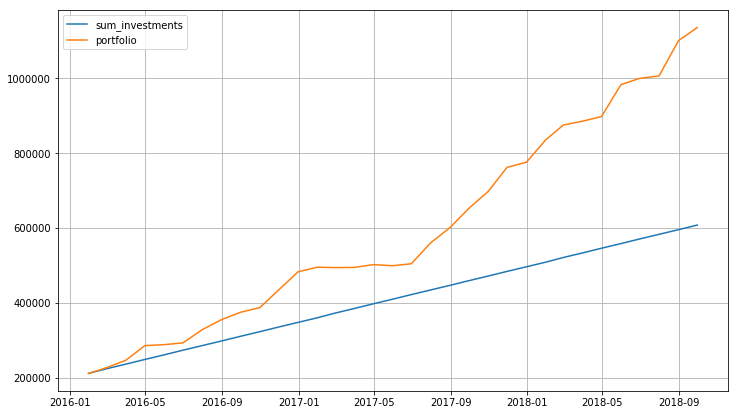

In [117]:
# start balance, just for first time
last_balance = 1000.0

# start current money
cur_money = 200000.0

# save history
save_history = []

# massiv for saving our investments and deals
total_investments = []
total_investments.append(cur_money)
sdelki = []
divs_year= []

# create DF for saving information
a =np.vstack([stocks_all,[0]*len(stocks_all)])
portfolio = pd.DataFrame(a,columns=stocks_all).drop(0)
aktiv = pd.DataFrame(a,columns=stocks_all).drop(0)

# minimal sum for add every month
min_add_sum = np.random.randint(14000)+0

##last_portfolio_bal = np.sum(aktiv)

## comissions by MOEX and broker
comis = 0.001
depo_comis = 150



for idx, month in enumerate(months):
    ## take random day n month for investments - for exmaple
    day = rand_date(prices[prices['month_id']==month].date.values)
    
    ## take all preces our stocks in that day
    price = prices[prices.date==day][['close','paper']]
    stocks = []
    
    # part of portfolio for one stock
    for idx, paper in enumerate(stocks_all):
        if price[price.paper==paper].close.values<max_bye_price[idx]*in_lot[in_lot.stock==paper].stock_in_lot.values:
            stocks.append(paper)
#         else: 
#             if paper in ['MTSS','LKOH']:
#                 print paper, day, max_bye_price[idx],in_lot[in_lot.stock==paper].stock_in_lot.values,price[price.paper==paper].close.values
        
    if len(stocks)>1: dolya = 1.0/len(stocks)
    else: dolya = 1.0
    
    ## every month add money, growing function becose we have inflation
    add_money = min_add_sum#*(1+idx/50.0)
    
    ## current money on account
    cur_money+=add_money
    #print 'start money:',cur_money
    
    ## saving sum of our investments 
    total_investments.append(add_money)
    
    
    
    not_bye_paper = []
    
    ## check button 
    check=1 
    
    # minus month comission for payment to depositary
    cur_money-=depo_comis
    
    stoper = 0
    
    while check!=0:
        for idz,stock in enumerate(stocks):
            if int(aktiv[stock].sum())*price[price.paper==stock].close.values<dolya*(last_balance+cur_money):
                if cur_money - np.float(price[price['paper']==stock].close)*(1+comis)>0:
                    cur_money = cur_money - np.float(price[price['paper']==stock].close)*(1+comis)
                    print ('after buy',stock, np.float(price[price['paper']==stock].close),cur_money)
                    sdelki.append([stock,1,day])
                else: 
                    sdelki.append([stock,0,day])
                    print ('not enough money for buy',stock, np.float(price[price['paper']==stock].close), cur_money)
                    check=0
            else: not_bye_paper.append(stock)
        for stock in list(set(stocks_all)-set(stocks))+list(set(not_bye_paper)):
            sdelki.append([stock,0,day])
            print ('paper is expensive or you enough to by they (dolya>)',stock,cur_money)
         
        sdelki1 = pd.DataFrame(sdelki)
        aktiv = pd.pivot_table(sdelki1, index=[2], columns=[0],aggfunc=sum)
        aktiv = aktiv.fillna(0)
        aktiv.columns = aktiv.columns.levels[1]
      
        last_balance = cur_money
        print ('')
        for i in stocks_all:
            try: 
                last_balance +=aktiv[i].sum()*price[price.paper==i].close.values
                print ('in portfolio',aktiv[i].sum(),i,price[price.paper==i].close.values, aktiv[i].sum()*price[price.paper==i].close.values)
            except ValueError:
                continue
        
        stoper +=1
        if stoper>12: 
            print ('all stocks is so expensive :))')
            print ('')
            check=0
    
    divs_now = divs[divs.month_id==month]
    
    dividends = 0
    for paper in aktiv.columns:
        dividend = 0
        if divs_now[divs_now.tiker==paper].div_by_lot.values>0:
            dividend = aktiv[paper].sum()*divs_now[divs_now.tiker==paper].div_by_lot.values
            divs_year.append([month,float(dividend)*0.87,paper])
            print (month, paper, 'dividend -', float(dividend)*0.87)
        dividends += dividend
    
    #Если дивиденды снимаем - комментируем следующую строку
    cur_money +=float(dividends)*0.87
    print (month, add_money,np.sum(total_investments),last_balance,dolya*last_balance,cur_money)
    if dividends>0: print ('In this month your dividend is ',dividends*0.87)
    
    
    save_history.append([month,np.sum(total_investments),last_balance])
print (name, ', your score:',last_balance/np.sum(total_investments))
save_history = pd.DataFrame(save_history, columns = ['month','sum_investments','portfolio'])
plt.figure(figsize=(12,7))
dates = pd.date_range(start=prices.date.min(), periods=len(months), freq='M')
plt.plot(dates, save_history.sum_investments)
plt.plot(dates, save_history.portfolio)
plt.grid()
plt.legend()
plt.show()

Юрий , your score: [1.86640309]


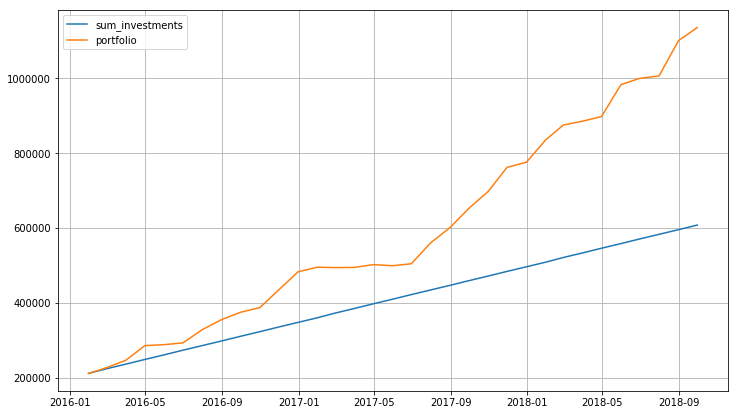

In [118]:
print (name, ', your score:',last_balance/np.sum(total_investments))
plt.figure(figsize=(12,7))
dates = pd.date_range(start=prices.date.min(), periods=len(months), freq='M')
plt.plot(dates, save_history.sum_investments)
plt.plot(dates, save_history.portfolio)
plt.grid()
plt.legend()
plt.show()
#plt.savefig('investments.png')

In [108]:
divs_year = pd.DataFrame(divs_year, columns=['month','money','paper'])
divs_year['year'] = divs_year['month'].apply(lambda x : int(x/100.0))
divs_year_total = pd.DataFrame(divs_year.groupby(['year'])['money'].sum())
divs_year_total

,money
year,
2017,25073.7480
2018,19437.5226


In [109]:
print ('your dividends:',divs_year_total.values.sum())
print ('your total_investments:',sum(total_investments))
print ('your portfolio:',last_balance)

your dividends: 44511.2706
your total_investments: 383204.0
your portfolio: [588828.082]


In [110]:
divs_paper_total = pd.DataFrame(divs_year.groupby(['paper'])['money'].sum())
divs_paper_total

,money
paper,
AKRN,1090.9800
CHMF,4596.2100
GMKN,10483.6566
LKOH,6181.3500
MAGN,0.0000
MTSS,0.0000
NLMK,7583.6160
SBER,0.0000
SIBN,1192.2480


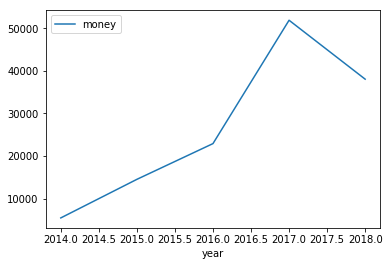

In [91]:
divs_year_total.plot()

In [81]:
aktiv.sum()

0
AKRN     16
CHMF     13
GMKN     14
LKOH     16
MAGN     23
MTSS      9
NLMK     58
SBER     22
SIBN     24
SNGSP    13
TATNP    31
VSMO      3
dtype: int64

In [20]:
sdelki = pd.DataFrame(sdelki)

In [21]:
aktiv = pd.pivot_table(sdelki, index=[2], columns=[0],aggfunc=np.sum)
aktiv = aktiv.fillna(0)
aktiv.columns = aktiv.columns.levels[1]

In [22]:
print ('Total investments')
np.sum(total_investments)

Total investments


3243056.0

In [23]:
print ('Now portfolio wheight')
last_balance = 0
for i in stocks_all:
    last_balance +=aktiv[i].sum()*price[price.paper==i].close.values
    print (i,aktiv[i].sum()*price[price.paper==i].close.values)
print (last_balance+cur_money)

Now portfolio wheight
CHMF [1458212.]
NLMK [829610.4]
GMKN [1668256.]
AKRN [1203104.]
VSMO [1032730.]
MAGN [1377927.]
TATNP [2062012.]
SNGSP [778872.]
MTSS [336704.]
SIBN [1191872.]
SBER [655395.5]
LKOH [1438227.5]
[14825552.76368]
